In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv("data/ml_compile.csv")

In [9]:
df.columns

Index(['year_month', 'land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent', 'bear_rsf_mean', 'bear_rsf_var'],
      dtype='object')

In [41]:
df.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,bear_rsf_mean,bear_rsf_var
count,1392.000000,1392.000000,1392.000000,1392.000000,1428.000000,1434.000000,1446.000000,752.000000,506.000000,334.000000,334.000000
mean,8.762454,14.516995,3.000047,15.317030,0.122602,0.213536,0.213620,355.582926,11.405146,15.820979,3.045457
std,4.199958,4.294911,4.114758,1.259405,0.709268,0.620087,0.630979,28.949294,3.252910,2.430975,1.087362
min,1.395000,7.082000,-4.298000,12.839000,-1.951000,-1.772000,-1.647000,312.430000,3.565600,6.093212,0.000000
25%,4.655750,10.426250,-1.103250,14.150750,-0.354250,-0.184750,-0.198000,329.112500,8.571152,14.872230,2.420035
50%,9.087500,14.899000,3.213500,15.373000,0.022500,0.140500,0.098000,352.880000,12.095933,16.388356,2.949145
75%,12.953000,18.867000,7.048000,16.477750,0.583250,0.563500,0.576500,378.857500,14.318582,17.471275,3.629055
max,15.482000,21.320000,9.715000,17.611000,2.970000,2.805000,2.877000,417.070000,16.341938,20.000000,6.027518


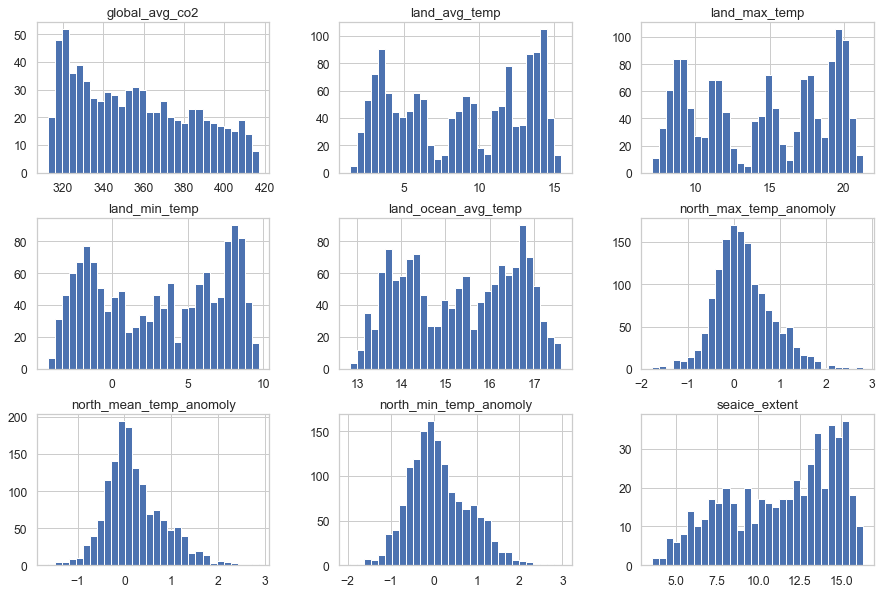

In [31]:
import seaborn as sns
import pandas as pd
numerical = ['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']
X[numerical].hist(bins=30, figsize=(15, 10), layout=(3, 3));

In [40]:
print(X.isnull().sum())
print(y_rsf.isnull().sum())
print(y_var.isnull().sum())

land_avg_temp               59
land_max_temp               59
land_min_temp               59
land_ocean_avg_temp         59
north_min_temp_anomoly      23
north_max_temp_anomoly      17
north_mean_temp_anomoly      5
global_avg_co2             699
seaice_extent              945
dtype: int64
1117
1117


# Preprocessing the Data

## Assign X(features) and y(target) data

In [49]:
X = df[['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent']]
y_rsf = df["bear_rsf_mean"].values.reshape(-1, 1)
y_var = df["bear_rsf_var"].values.reshape(-1, 1)
print(X.shape, y_rsf.shape)

## Split the data into testing and training dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_rsf_train, y_rsf_test = train_test_split(X, y_rsf, test_size=0.2, random_state=42)

## MinMaxScalar to fit and transform X features and y target

In [53]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_rsf_minmax = MinMaxScaler().fit(y_rsf_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_rsf_train_minmax = y_rsf_minmax.transform(y_rsf_train)
y_rsf_test_minmax = y_rsf_minmax.transform(y_rsf_test)
